In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from datetime import datetime
from sklearn.metrics import classification_report

In [3]:
%matplotlib inline

In [4]:
ad_data = pd.read_csv('advertising.csv')

In [5]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


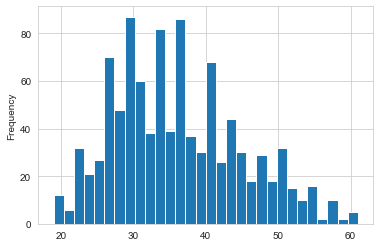

In [21]:
sns.set_style('whitegrid')
ad_data['Age'].plot.hist(bins=30)

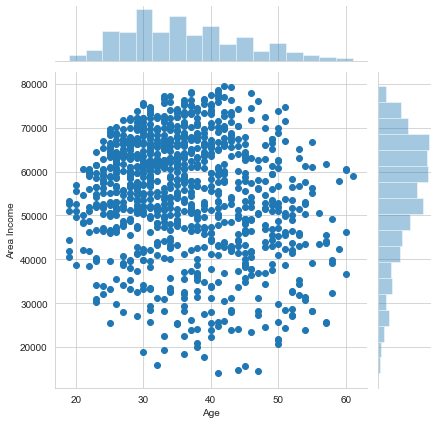

In [25]:
sns.jointplot(data=ad_data,x='Age',y='Area Income')

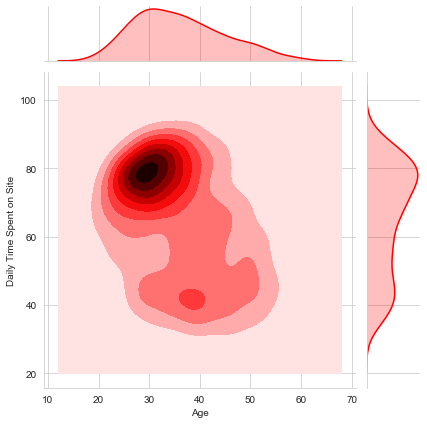

In [28]:
sns.jointplot(data=ad_data,x='Age',y='Daily Time Spent on Site',kind='kde',color='red')

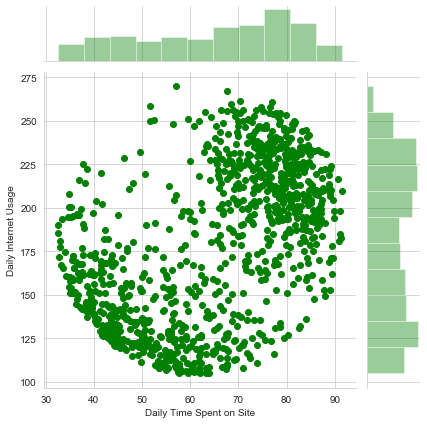

In [30]:
sns.jointplot(data=ad_data,x='Daily Time Spent on Site',y='Daily Internet Usage',color='green')

In [41]:
ad_data['hour'] = ad_data['Timestamp'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour)

C:\Users\Upasana\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Upasana\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


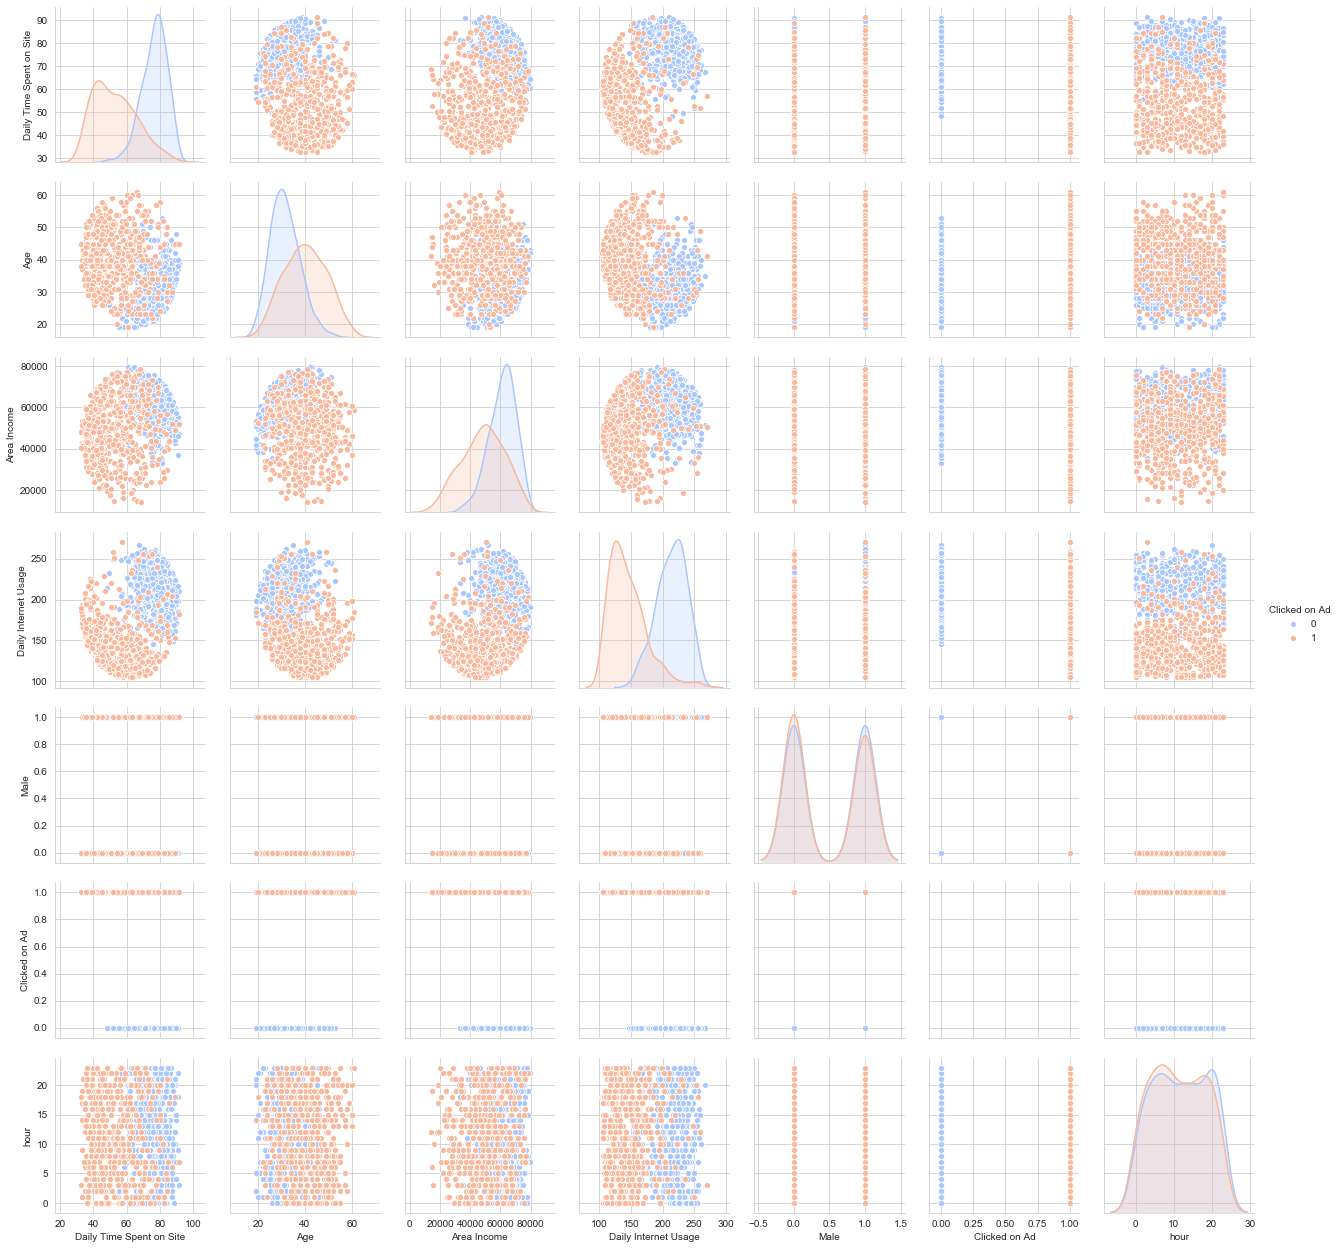

In [43]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='coolwarm')

In [42]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'hour'],
      dtype='object')

In [44]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Male']]

In [45]:
y = ad_data['Clicked on Ad']

In [46]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [47]:
logr = LogisticRegression(solver='liblinear')

In [48]:
logr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
predicted = logr.predict(X_test)

In [53]:
pd.DataFrame(classification_report(y_test,predicted,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.908537,0.941176,0.923333,0.924857,0.924095
recall,0.949045,0.895105,0.923333,0.922075,0.923333
f1-score,0.928349,0.917563,0.923333,0.922956,0.923207
support,157.000000,143.000000,0.923333,300.000000,300.000000
